# Detecting Malicious URLs using Machine Learning

In [166]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os


In [167]:
urldata = pd.read_csv("urldata.csv")

In [168]:
urldata.head()

,Unnamed: 0,url,label,result
0,0,https://www.google.com,benign,0.0
1,1,https://www.youtube.com,benign,0.0
2,2,https://www.facebook.com,benign,0.0
3,3,https://www.baidu.com,benign,0.0
4,4,https://www.wikipedia.org,benign,0.0


In [169]:
#Removing the unnamed columns as it is not necesary.
urldata = urldata.drop('Unnamed: 0',axis=1)

In [170]:
urldata.head()

,url,label,result
0,https://www.google.com,benign,0.0
1,https://www.youtube.com,benign,0.0
2,https://www.facebook.com,benign,0.0
3,https://www.baidu.com,benign,0.0
4,https://www.wikipedia.org,benign,0.0


In [161]:
urldata.shape

(366007, 22)

In [162]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366007 entries, 0 to 366006
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   url              366007 non-null  object 
 1   label            366007 non-null  object 
 2   result           366007 non-null  float64
 3   url_length       366007 non-null  int64  
 4   hostname_length  366007 non-null  int64  
 5   path_length      366007 non-null  int64  
 6   fd_length        366007 non-null  int64  
 7   tld_length       366007 non-null  int64  
 8   count-           366007 non-null  int64  
 9   count@           366007 non-null  int64  
 10  count?           366007 non-null  int64  
 11  count%           366007 non-null  int64  
 12  count.           366007 non-null  int64  
 13  count=           366007 non-null  int64  
 14  count-http       366007 non-null  int64  
 15  count-https      366007 non-null  int64  
 16  count-www        366007 non-null  int64  
 

In [163]:
urldata.isnull().sum()

url                0
label              0
result             0
url_length         0
hostname_length    0
path_length        0
fd_length          0
tld_length         0
count-             0
count@             0
count?             0
count%             0
count.             0
count=             0
count-http         0
count-https        0
count-www          0
count-digits       0
count-letters      0
count_dir          0
use_of_ip          0
short_url          0
dtype: int64

In [171]:
urldata = urldata.dropna()
print(urldata)

                                                      url      label  result
0                                  https://www.google.com     benign     0.0
1                                 https://www.youtube.com     benign     0.0
2                                https://www.facebook.com     benign     0.0
3                                   https://www.baidu.com     benign     0.0
4                               https://www.wikipedia.org     benign     0.0
...                                                   ...        ...     ...
366002                          http://fleef.com/Wait.php  malicious     1.0
366003  http://aes.edu.au/wp-content/themes/twentyfour...  malicious     1.0
366004  http://scurity7789.atspace.cc/helpes-akses/hel...  malicious     1.0
366005           http://necessarius.net/stern/o/index.php  malicious     1.0
366006  http://teal-handyman-home-maintenance.com.au/i...  malicious     1.0

[366007 rows x 3 columns]


## 1. DATA PREPROCESSING

### 1.1 Length Features

In [111]:
!pip install tld


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [172]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [113]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [114]:
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [115]:
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [116]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [117]:
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [118]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,...,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url,tld
0,https://www.google.com,benign,0.0,22,14,0,0,3,0,0,...,0,1,1,1,0,17,0,1,1,com
1,https://www.youtube.com,benign,0.0,23,15,0,0,3,0,0,...,0,1,1,1,0,18,0,1,1,com
2,https://www.facebook.com,benign,0.0,24,16,0,0,3,0,0,...,0,1,1,1,0,19,0,1,1,com
3,https://www.baidu.com,benign,0.0,21,13,0,0,3,0,0,...,0,1,1,1,0,16,0,1,1,com
4,https://www.wikipedia.org,benign,0.0,25,17,0,0,3,0,0,...,0,1,1,1,0,20,0,1,1,org


In [119]:
urldata = urldata.drop("tld", axis=1)

In [120]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0.0,22,14,0,0,3,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0.0,23,15,0,0,3,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0.0,24,16,0,0,3,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0.0,21,13,0,0,3,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0.0,25,17,0,0,3,0,0,...,2,0,1,1,1,0,20,0,1,1


### 1.2 Count Features

In [121]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))

In [122]:
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))

In [123]:
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))

In [124]:
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))

In [125]:
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))

In [126]:
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))

In [127]:
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))

In [128]:
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))

In [129]:
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [130]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [131]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [132]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

In [133]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0.0,22,14,0,0,3,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0.0,23,15,0,0,3,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0.0,24,16,0,0,3,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0.0,21,13,0,0,3,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0.0,25,17,0,0,3,0,0,...,2,0,1,1,1,0,20,0,1,1


### 1.3 Binary Features

In [134]:
import re

In [135]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [136]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:7: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
C:\Users\priya\AppData\Local\Temp\ipykernel_12780\1550753800.py:2: SyntaxWarning: invalid escape sequence '\.'
  match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.

In [138]:
urldata.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0.0,22,14,0,0,3,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0.0,23,15,0,0,3,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0.0,24,16,0,0,3,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,benign,0.0,21,13,0,0,3,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,benign,0.0,25,17,0,0,3,0,0,...,2,0,1,1,1,0,20,0,1,1


# 2. Data Visualization

Text(0, 0.5, 'Number Of URLs')

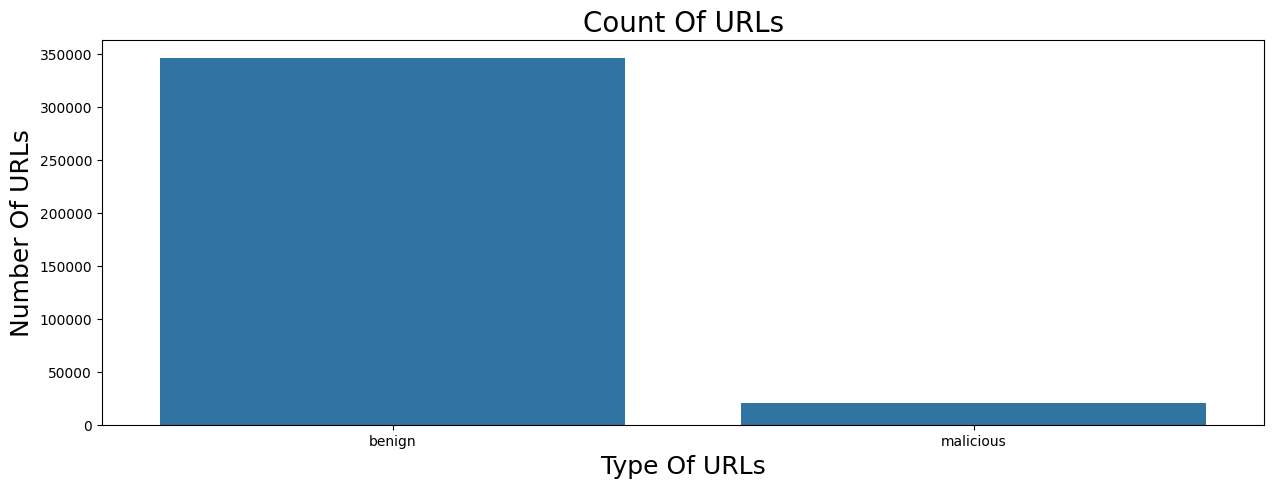

In [139]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [140]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

Percent Of Malicious URLs:5.54 %
Percent Of Benign URLs:94.46 %


(0.0, 1000.0)

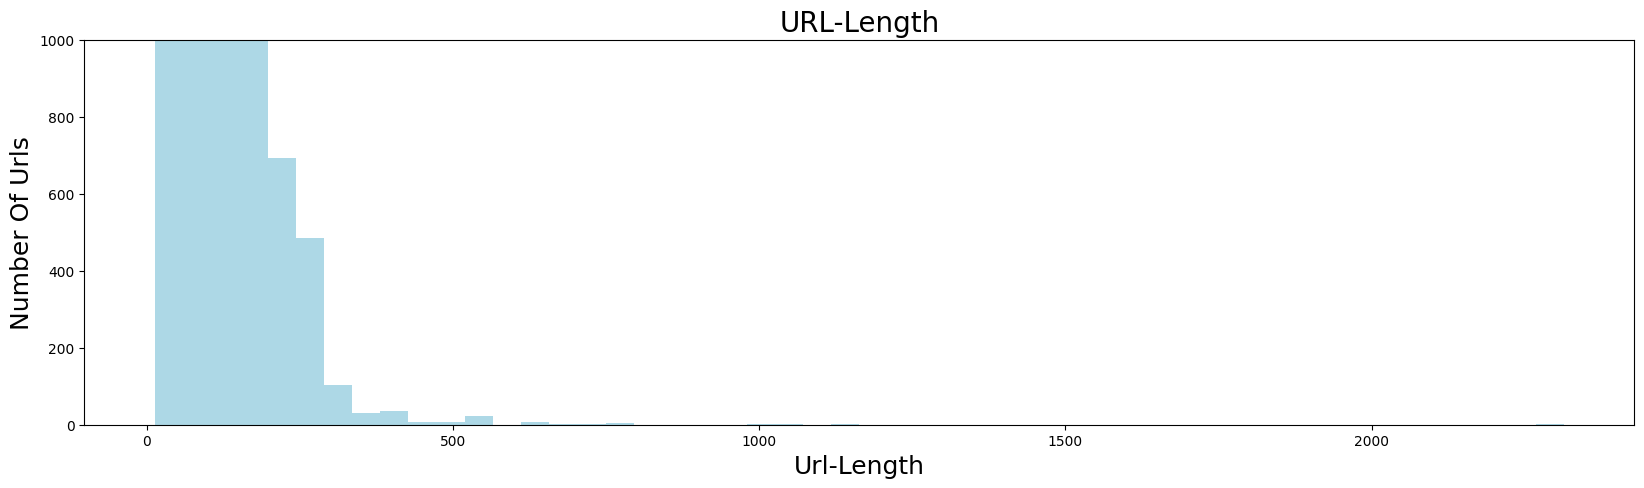

In [141]:
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)


(0.0, 1000.0)

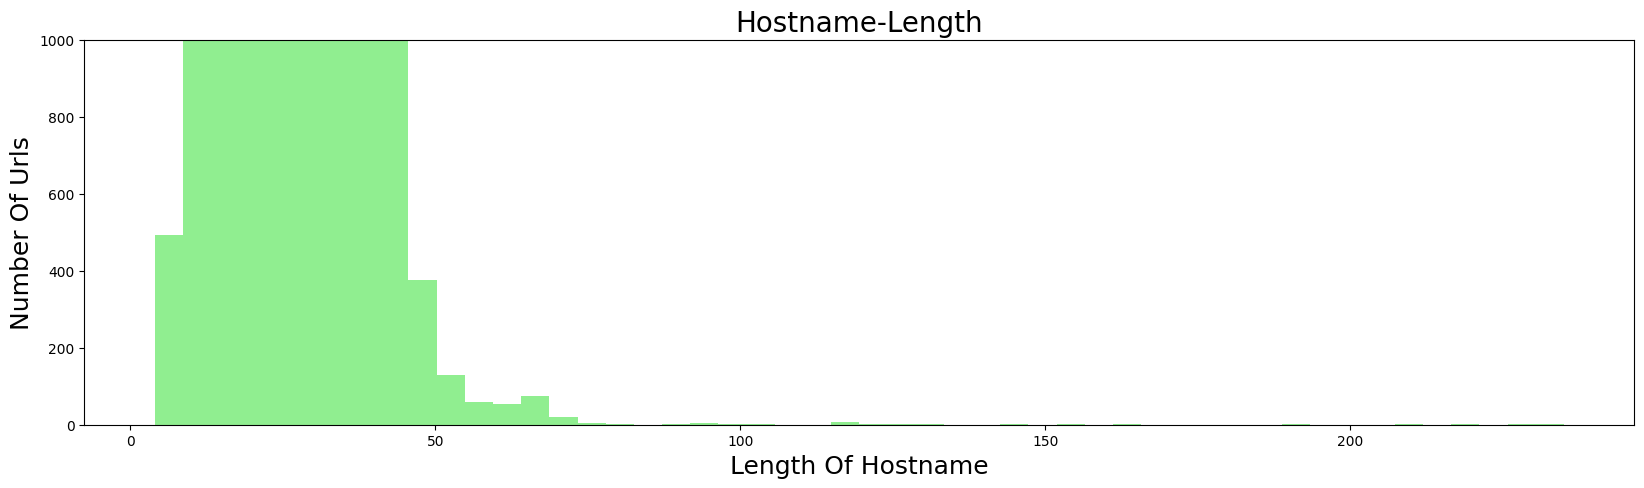

In [142]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

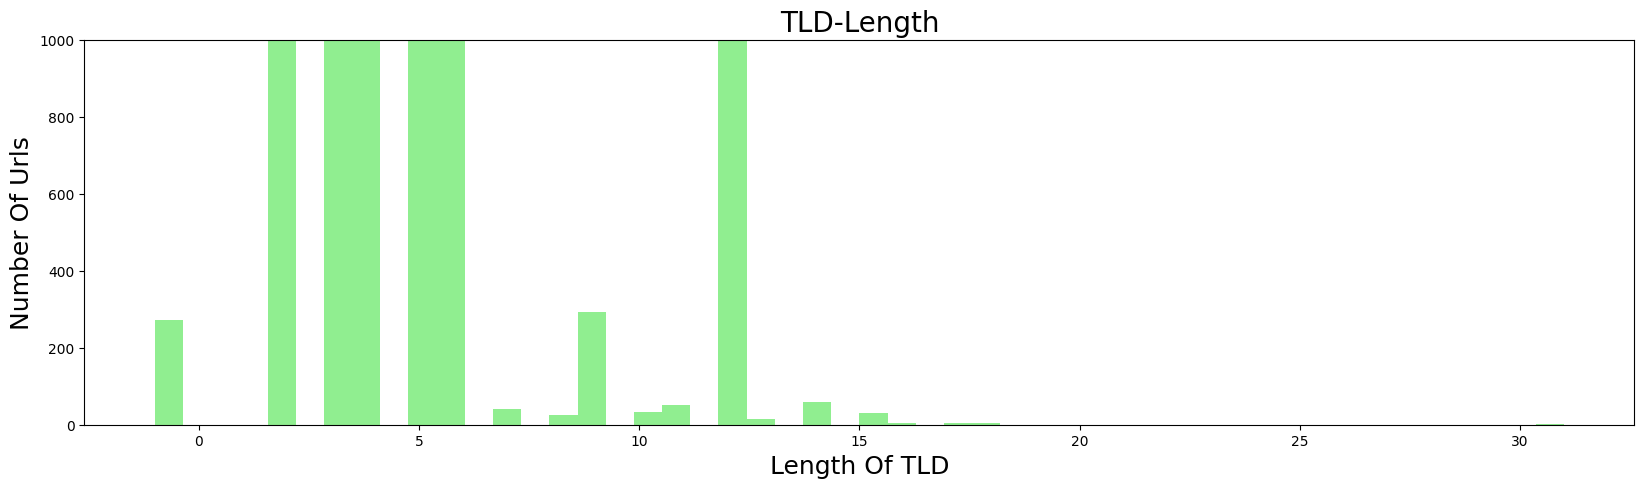

In [143]:
plt.figure(figsize=(20,5))
plt.hist(urldata['tld_length'],bins=50,color='Lightgreen')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

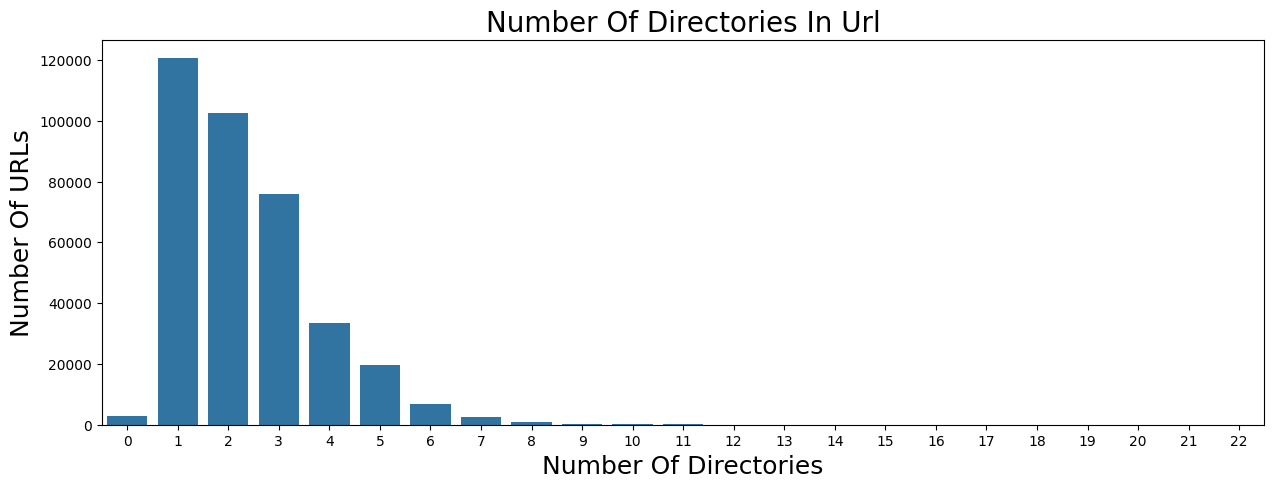

In [144]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

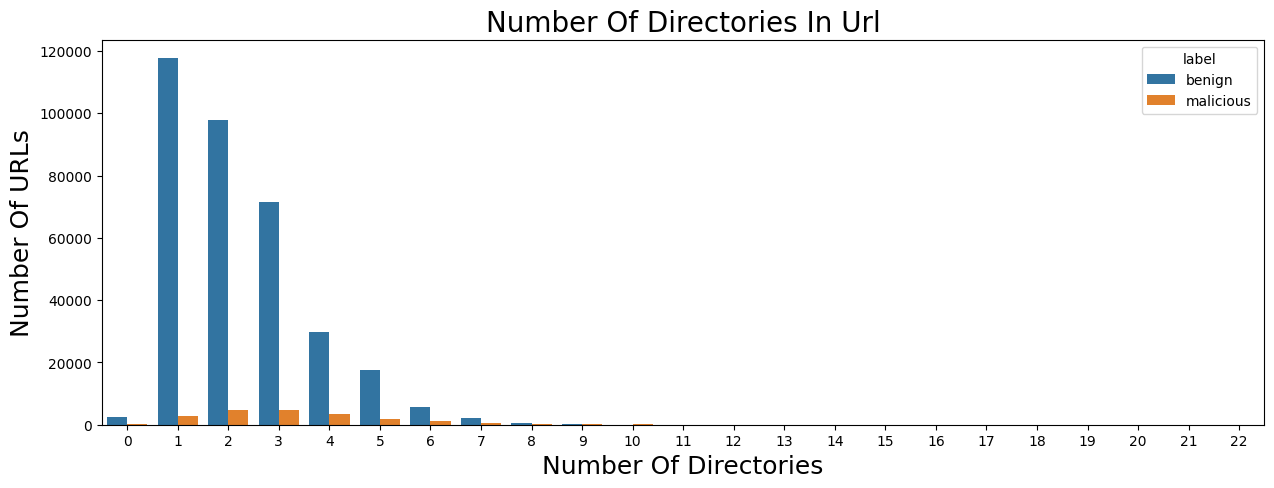

In [145]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

## 3. Building Models Using Lexical Features Only

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

In [147]:
#Predictor Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Target Variable
y = urldata['result']

In [148]:
x.shape

(366007, 17)

In [149]:
y.shape

(366007,)

In [150]:
#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

In [151]:
#Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

dt_predictions = dt_model.predict(x_test)
accuracy_score(y_test,dt_predictions)


0.9990437345094748

In [152]:
print(confusion_matrix(y_test,dt_predictions))

[[241849    141]
 [   104  14111]]


In [153]:
#Random Forest
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_predictions = rfc.predict(x_test)
accuracy_score(y_test, rfc_predictions)

0.9994028219589781

In [154]:
print(confusion_matrix(y_test,rfc_predictions))

[[241948     42]
 [   111  14104]]
